### ***DATA SCIENCE PROJECT***

---



**Task-1:** **Data Cleaning**


* Handle the missing data for both categorical and numerical variables (by dropping and imputing). (Note: The missing values cannot be just ignored or deleted without examining)
*Remove unwanted observations – Duplicate/ irrelevant /repetitive.
Fix the typos and inconsistent capitalization.







In [41]:
import numpy as np 
import pandas as pd
import io 
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import scipy
from datetime import date, timedelta, datetime
  
Data = pd.read_csv('AC.csv') 
print(Data)


            Date  ...                                            Summary
0     09/17/1908  ...  During a demonstration flight, a U.S. Army fly...
1     09-07-1909  ...  Eugene Lefebvre was the first pilot to ever be...
2     07-12-1912  ...  First U.S. dirigible Akron exploded just offsh...
3     08-06-1913  ...  The first fatal airplane accident in Canada oc...
4     09-09-1913  ...  The airship flew into a thunderstorm and encou...
...          ...  ...                                                ...
4962  04/16/2019  ...  While the aircraft was in the initial climb, p...
4963  05-05-2019  ...  The aircraft crashed while en route on a retur...
4964  05-05-2019  ...  Forty-five minutes after taking off from Mosco...
4965  06-03-2019  ...                 Crashed about 34km WNW of Mechuka.
4966  07/30/2019  ...  The Pakistani military plane, on a training fl...

[4967 rows x 17 columns]


In [42]:
#What type are the data sets?
Data.dtypes

Date                      object
Time                      object
Location                  object
Operator                  object
Flight #                  object
Route                     object
AC Type                   object
Registration              object
cn/ln                     object
Aboard                   float64
Aboard Passangers        float64
Aboard Crew              float64
Fatalities               float64
Fatalities Passangers    float64
Fatalities Crew          float64
Ground                   float64
Summary                   object
dtype: object

In [43]:
#Looking at the top 5 head and tail columns in the data set
Data.head(5)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09-07-1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07-12-1912,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08-06-1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09-09-1913,18:30:00,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [44]:
Data.tail(5)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
4962,04/16/2019,11:00:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p..."
4963,05-05-2019,18:30:00,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...
4964,05-05-2019,18:30:00,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...
4965,06-03-2019,13:00:00,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.
4966,07/30/2019,02:00:00,"Rawalpindi, India",Military - Pakistan Army,NaN,Training,Beechcraft B300 King Air,766,B766,5.0,0.0,5.0,5.0,0.0,5.0,14.0,"The Pakistani military plane, on a training fl..."


In [45]:
#Total count of each column
Data.count()

Date                     4967
Time                     3457
Location                 4963
Operator                 4957
Flight #                 1315
Route                    4193
AC Type                  4952
Registration             4694
cn/ln                    4299
Aboard                   4949
Aboard Passangers        4738
Aboard Crew              4741
Fatalities               4959
Fatalities Passangers    4725
Fatalities Crew          4726
Ground                   4926
Summary                  4903
dtype: int64

In [46]:
#dimensions of the dataset (# of rows,# of columns)
Data.shape

(4967, 17)

In [47]:
#Calculating missing values in rows
Data.isnull().sum()

Date                        0
Time                     1510
Location                    4
Operator                   10
Flight #                 3652
Route                     774
AC Type                    15
Registration              273
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     41
Summary                    64
dtype: int64

In [48]:
#Print first few lines of the date column
print(Data['Date'].head())
#notice that the format is messed up

0    09/17/1908
1    09-07-1909
2    07-12-1912
3    08-06-1913
4    09-09-1913
Name: Date, dtype: object


In [49]:
#formatting the date into a single format: mm/dd/yyyy
def formatDate(date):
    date = str(date)
    if '/' in date:
        formattedDate = date
    else:
        splitVar = date.replace('[','').replace(']','').split('-')
        print(splitVar)
        formattedDate = str(splitVar[1]) + '/' +str(splitVar[0]) + '/' + str(splitVar[2])
    return formattedDate
Data["Date"] = Data["Date"].apply(formatDate)

['09', '07', '1909']
['07', '12', '1912']
['08', '06', '1913']
['09', '09', '1913']
['03', '05', '1915']
['09', '03', '1915']
['10', '01', '1916']
['03', '04', '1917']
['04', '07', '1918']
['05', '10', '1918']
['08', '11', '1918']
['08', '02', '1919']
['10', '02', '1919']
['12', '11', '1919']
['03', '10', '1920']
['04', '10', '1920']
['04', '11', '1920']
['05', '12', '1920']
['06', '06', '1920']
['09', '01', '1920']
['10', '02', '1920']
['10', '05', '1920']
['11', '07', '1920']
['02', '03', '1921']
['02', '09', '1921']
['04', '06', '1921']
['09', '06', '1921']
['12', '05', '1921']
['04', '07', '1922']
['04', '08', '1922']
['06', '03', '1922']
['07', '04', '1922']
['09', '07', '1922']
['10', '02', '1922']
['12', '03', '1922']
['01', '10', '1923']
['09', '07', '1923']
['12', '06', '1923']
['03', '07', '1924']
['06', '08', '1924']
['08', '01', '1924']
['11', '06', '1924']
['09', '03', '1925']
['09', '07', '1925']
['10', '01', '1925']
['02', '12', '1926']
['03', '08', '1926']
['07', '03', 

In [50]:
#new formatted Date column looks like this
Data["Date"]

0       09/17/1908
1       07/09/1909
2       12/07/1912
3       06/08/1913
4       09/09/1913
           ...    
4962    04/16/2019
4963    05/05/2019
4964    05/05/2019
4965    03/06/2019
4966    07/30/2019
Name: Date, Length: 4967, dtype: object

In [51]:
#Cleaning the time column
x=Data["Time"].dropna();
Data["Time"]=Data["Time"].fillna(statistics.mode(x))
Data["Time"] = Data["Time"].replace("114:20:00", statistics.mode(x))
Data["Time"] = Data["Time"].str.replace("18.40", "18:40")
Data["Time"] = Data["Time"].str.replace("0943", "09:43")
Data["Time"] = Data["Time"].str.replace("12\'20", "12:20")
Data["Time"] = Data["Time"].str.replace("22\'08", "22:08")
Data["Time"] = Data["Time"].str.replace("c: ", "")
Data["Time"] = Data["Time"].str.replace("c:", "")
Data["Time"] = Data["Time"].str.replace("c", "")

#Cleaned time column
Data["Time"]

0       17:18:00
1       15:00:00
2       06:30:00
3       15:00:00
4       18:30:00
          ...   
4962    11:00:00
4963    18:30:00
4964    18:30:00
4965    13:00:00
4966    02:00:00
Name: Time, Length: 4967, dtype: object

In [52]:
#Dropping unwanted columns 
Data = Data.drop(['Registration', 'cn/ln','Ground','Flight #'], axis=1)
Data.head()

,Date,Time,Location,Operator,Route,AC Type,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Summary
0,09/17/1908,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/09/1909,15:00:00,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,12/07/1912,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,First U.S. dirigible Akron exploded just offsh...
3,06/08/1913,15:00:00,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30:00,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,The airship flew into a thunderstorm and encou...


In [53]:
#Creating new column for year, can be useful

Data['Year'] = pd.DatetimeIndex(Data['Date']).year
Data.head()

,Date,Time,Location,Operator,Route,AC Type,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Summary,Year
0,09/17/1908,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908
1,07/09/1909,15:00:00,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,1909
2,12/07/1912,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,1912
3,06/08/1913,15:00:00,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,The first fatal airplane accident in Canada oc...,1913
4,09/09/1913,18:30:00,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,The airship flew into a thunderstorm and encou...,1913


In [54]:
#Creating bins for decades
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010,2020]
decade_names = ["1900-1910", "1911-1920", "1921-1930", "1931-1940", "1941-1950",
              "1951-1960", "1961-1970", "1971-1980", "1981-1990", "1991-2000", "2001-2010","2011-2020"]
Data["Decade"] = pd.cut(Data["Year"], bins, labels=decade_names)
Data.head()

,Date,Time,Location,Operator,Route,AC Type,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Summary,Year,Decade
0,09/17/1908,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1900-1910
1,07/09/1909,15:00:00,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,1909,1900-1910
2,12/07/1912,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,1912,1911-1920
3,06/08/1913,15:00:00,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,The first fatal airplane accident in Canada oc...,1913,1911-1920
4,09/09/1913,18:30:00,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,The airship flew into a thunderstorm and encou...,1913,1911-1920


In [55]:
#Adding column operation Code
#Creating "Make Type"
#Creating "Category" - Military, Passenger, Others
#"Other" will comprise - Mail, Cargo and anything with missed data

word1 = "Military"
word2 = "Cargo"
word3 = "Mail"
word4 = "Passenger"

for index,row in Data.iterrows():
    Data.loc[index,"Make_Type"] = str(row["AC Type"])[:(str(row["AC Type"]).find(" "))]
    operator = row["Operator"]
    try:
        if word1 in operator:
            Op_Code = word1
        elif word2 in operator:
            Op_Code = "Others"
        elif word3 in operator:
            Op_Code = "Others"
        else:
            Op_Code = word4
    except:
        Op_Code = "Others"
    
    Data.loc[index,"Op_Code"] = Op_Code
Data["Operator"]=Data["Operator"].replace(np.nan, "Unknown")
Data.head()

,Date,Time,Location,Operator,Route,AC Type,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Summary,Year,Decade,Make_Type,Op_Code
0,09/17/1908,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1900-1910,Wright,Military
1,07/09/1909,15:00:00,"Juvisy-sur-Orge, France",Unknown,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,1909,1900-1910,Wright,Others
2,12/07/1912,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,1912,1911-1920,Dirigibl,Military
3,06/08/1913,15:00:00,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,The first fatal airplane accident in Canada oc...,1913,1911-1920,Curtiss,Passenger
4,09/09/1913,18:30:00,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,The airship flew into a thunderstorm and encou...,1913,1911-1920,Zeppelin,Military


In [56]:
#Create category of crash by reading the reason

#Cat1 = "Terrorism"
Cat2 = "Terrorism"
Cat3 = "Human Error"
Cat4 = "Fire"
Cat5 = "Landing/Takeoff"
Cat6 = "Machine Issue"
Cat7 = "War"
Cat8 = "Weather"
Cat9 = "Unknown"

#Sub categories
Cat1A = "Terrorism"
Cat1B = "Crashed"
Cat2A = "hijack"
Cat2B = "Hijack"
Cat2C = "Hijacked"
Cat2D = "hijacker"
Cat2E = "hijacking"
Cat2F = "Hijacking"
Cat2G = "hijacked"
Cat2H = "terrorists"
Cat2I = "Terrorism"
Cat2J = "Terrorist"
Cat3A = "demonstration"
Cat3B = "weight"
Cat3C = "tailspin"
Cat3D = "error"
Cat3E = "disorientation"
Cat3F = "checklist"
Cat3G = "non-compliance"
Cat4A = "fire"
Cat4B = "hydrogen"
Cat4C = "Fuel"
Cat5A = "landing"
Cat5B = "land"
Cat5C = "take off"
Cat5D = "approach"
Cat5E = "liftoff"
Cat5D = "attempting"
Cat6A = "propellers"
Cat6B = "structural"
Cat6C = "malfunctioning"
Cat6D = "engine"
Cat6E = "failure"
Cat6F = "wire"
Cat6G = "Broken"
Cat6H = "emergency"
Cat6I = "design"
Cat6J = "malfunction"
Cat6K = "mechanical"
Cat6L = "problem"
Cat7A = "Exploded"
Cat7B = "explode"
Cat7C = "shot"
Cat7D = "Shot"
Cat7E = "hit"
Cat8A = "storm"
Cat8B = "thunderstorm"
Cat8C = "lightning"
Cat8D = "weather"
Cat8E = "clud"
Cat8F = "Weather"
Cat8G = "winds"
Cat8H = "fog"
Cat8I = "rain"
Cat8J = "gust"
Cat8K = "heavy"
Cat8L = "violent"
Cat8M = "ice"

for index,row in Data.iterrows():
    crash = row["Summary"]
    try:
        if Cat2A in crash or Cat2B in crash or Cat2C in crash or Cat2D in crash or \
            Cat2E in crash or Cat2F in crash or Cat2G in crash or Cat2H in crash or \
            Cat2I in crash or Cat2J in crash:
            Op_Code = Cat2
        elif Cat7A in crash or Cat7B in crash or Cat7C in crash or Cat7D in crash or Cat7E in crash:
            Op_Code = Cat7
        elif Cat3A in crash or Cat3B in crash or Cat3C in crash or \
             Cat3D in crash or Cat3E in crash or Cat3F in crash or Cat3G in crash:
            Op_Code = Cat3
        elif Cat4A in crash or Cat4B in crash or Cat4C in crash:
            Op_Code = Cat4
        elif Cat5A in crash or Cat5B in crash or Cat5C in crash or Cat5D in crash:
            Op_Code = Cat5
        elif Cat6A in crash or Cat6B in crash or Cat6C in crash or Cat6D in crash or Cat6E in crash or \
            Cat6F in crash or Cat6G in crash or Cat6H in crash or \
            Cat6I in crash or Cat6J in crash or Cat6K in crash or Cat6L in crash:
            Op_Code = Cat6
        elif Cat8A in crash or Cat8B in crash or Cat8C in crash or Cat8D in crash or Cat8E in crash or \
            Cat8F in crash or Cat8G in crash or Cat8H in crash or Cat8I in crash or \
            Cat8J in crash or Cat8K in crash or Cat8L in crash or Cat8M in crash:
            
            Op_Code = Cat8
        else:
            Op_Code = "Unknown"
    except:
        Op_Code = "Unknown"
    Data.loc[index,"Accident_Code"] = Op_Code
    
Data.head()

,Date,Time,Location,Operator,Route,AC Type,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Summary,Year,Decade,Make_Type,Op_Code,Accident_Code
0,09/17/1908,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1900-1910,Wright,Military,Human Error
1,07/09/1909,15:00:00,"Juvisy-sur-Orge, France",Unknown,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,1909,1900-1910,Wright,Others,Unknown
2,12/07/1912,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,1912,1911-1920,Dirigibl,Military,War
3,06/08/1913,15:00:00,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,The first fatal airplane accident in Canada oc...,1913,1911-1920,Curtiss,Passenger,Weather
4,09/09/1913,18:30:00,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,The airship flew into a thunderstorm and encou...,1913,1911-1920,Zeppelin,Military,Landing/Takeoff


In [57]:
#Replacing the missing values in Route, Location, AC Type, Summary with 'Unknown' value
Data["Route"]=Data["Route"].replace(np.nan, "Unknown")
Data["Location"]=Data["Location"].replace(np.nan, "Unknown")
Data["AC Type"]=Data["AC Type"].replace(np.nan, "Unknown")
Data["Summary"]=Data["Summary"].replace(np.nan, "Unknown")

#Replacing the missing values in Aboard column with mode of that column excluding the missing values
temp2=Data["Aboard"].dropna()
Data["Aboard"]=Data["Aboard"].fillna(statistics.mode(temp2))

#Replacing the missing values in Fatalities column with mean of that column excluding the missing values
temp3=Data["Fatalities"].dropna()
Data["Fatalities"]=Data["Fatalities"].fillna(math.ceil(statistics.mean(temp3)))
Data.head(5)

,Date,Time,Location,Operator,Route,AC Type,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Summary,Year,Decade,Make_Type,Op_Code,Accident_Code
0,09/17/1908,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1900-1910,Wright,Military,Human Error
1,07/09/1909,15:00:00,"Juvisy-sur-Orge, France",Unknown,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,1909,1900-1910,Wright,Others,Unknown
2,12/07/1912,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,1912,1911-1920,Dirigibl,Military,War
3,06/08/1913,15:00:00,"Victoria, British Columbia, Canada",Private,Unknown,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,The first fatal airplane accident in Canada oc...,1913,1911-1920,Curtiss,Passenger,Weather
4,09/09/1913,18:30:00,Over the North Sea,Military - German Navy,Unknown,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,The airship flew into a thunderstorm and encou...,1913,1911-1920,Zeppelin,Military,Landing/Takeoff


In [58]:
#Rearrange columns for better visibility
Data = Data[["Decade","Year","Date","Time","Location",
                         "Operator", "Op_Code","Route",
                         "AC Type","Make_Type","Aboard","Fatalities",
                         "Accident_Code","Summary"]]
Data.head()

,Decade,Year,Date,Time,Location,Operator,Op_Code,Route,AC Type,Make_Type,Aboard,Fatalities,Accident_Code,Summary
0,1900-1910,1908,09/17/1908,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Military,Demonstration,Wright Flyer III,Wright,2.0,1.0,Human Error,"During a demonstration flight, a U.S. Army fly..."
1,1900-1910,1909,07/09/1909,15:00:00,"Juvisy-sur-Orge, France",Unknown,Others,Air show,Wright Byplane,Wright,1.0,1.0,Unknown,Eugene Lefebvre was the first pilot to ever be...
2,1911-1920,1912,12/07/1912,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Military,Test flight,Dirigible,Dirigibl,5.0,5.0,War,First U.S. dirigible Akron exploded just offsh...
3,1911-1920,1913,06/08/1913,15:00:00,"Victoria, British Columbia, Canada",Private,Passenger,Unknown,Curtiss seaplane,Curtiss,1.0,1.0,Weather,The first fatal airplane accident in Canada oc...
4,1911-1920,1913,09/09/1913,18:30:00,Over the North Sea,Military - German Navy,Military,Unknown,Zeppelin L-1 (airship),Zeppelin,20.0,14.0,Landing/Takeoff,The airship flew into a thunderstorm and encou...


In [59]:
Data

#To download cleaned dataset in .csv format
from google.colab import files
Data.to_csv('Cleaned_Dataset.csv') 
files.download('Cleaned_Dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
#Finding the number of missing values 
#in each column after cleaning the dataset.
Data.isnull().sum()

Decade           0
Year             0
Date             0
Time             0
Location         0
Operator         0
Op_Code          0
Route            0
AC Type          0
Make_Type        0
Aboard           0
Fatalities       0
Accident_Code    0
Summary          0
dtype: int64

**Task-2: Graph Visualization**
1. Visualize the dataset to exhibit meaningful insights from it.
2. Use any three graph visualization techniques.
3. Filter unwanted outliers.
*   a) Numerical – Box plot / Histogram.
*   b) Categorical – Bar chart.




**2A. Graphical Analysis**

Text(0, 0.5, 'Number of Crashes')

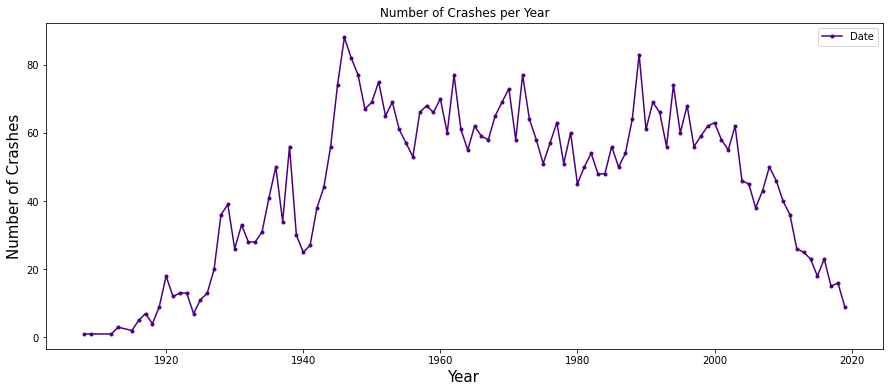

In [61]:
#Number of airplane crashes per year

Data['Date'] = pd.to_datetime(Data['Date'])
Data['Year'] = Data['Date'].dt.year
Data['Survived']= Data['Aboard'] - Data['Fatalities']

CrashpYear =Data.loc[:,["Date","Year"]].groupby(['Year']).count()
plot1 = CrashpYear.plot(title = 'Number of Crashes per Year', figsize = (15,6),color='indigo', marker = ".",linewidth=1.5)
plot1.set_xlabel("Year", fontsize= 15)
plot1.set_ylabel("Number of Crashes", fontsize = 15)


Text(0, 0.5, 'Number of fatalities')

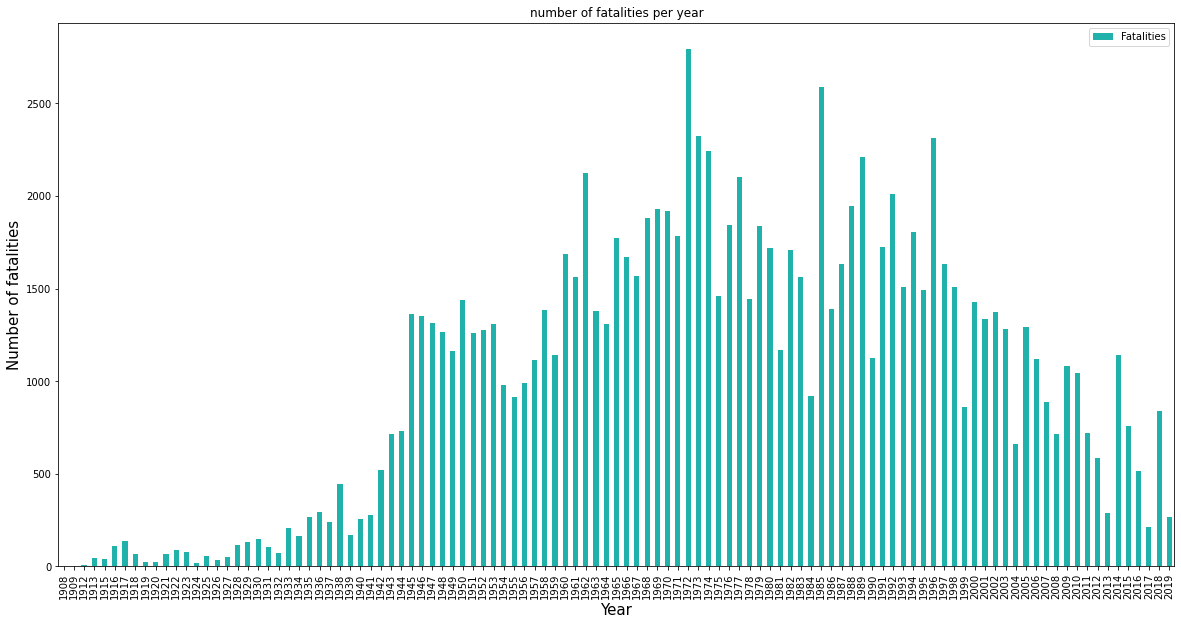

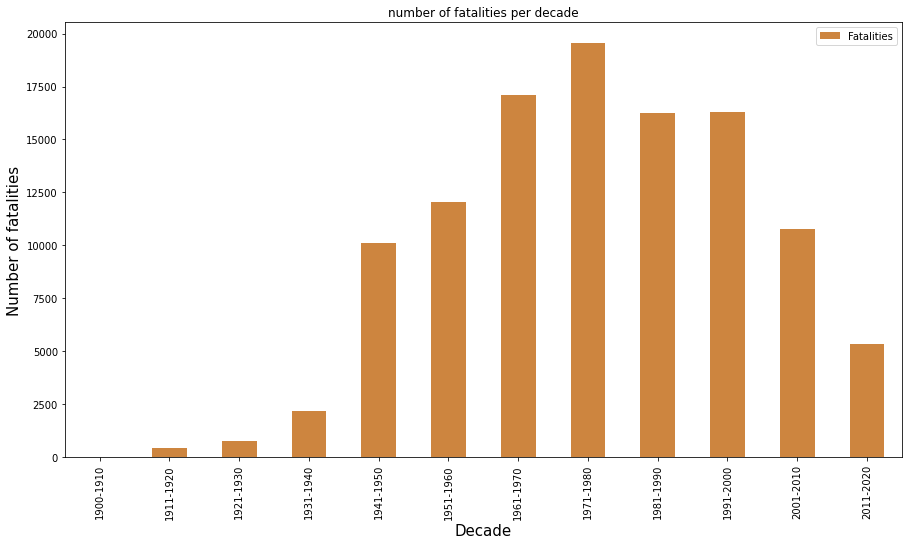

In [62]:
#Finding number of fatalities per year:

SumFatalities =Data.groupby('Year')[['Fatalities']].sum()

plot4 = SumFatalities.plot.bar(title="number of fatalities per year", figsize=(20,10), color='lightseagreen')
plot4.set_xlabel("Year", fontsize= 15)
plot4.set_ylabel("Number of fatalities", fontsize = 15)


#Finding number of fatalities per decade (for better representation):

SumFatalities =Data.groupby('Decade')[['Fatalities']].sum()

plot4 = SumFatalities.plot.bar(title="number of fatalities per decade", figsize=(15,8), color='peru')
plot4.set_xlabel("Decade", fontsize= 15)
plot4.set_ylabel("Number of fatalities", fontsize = 15)

In [63]:
Data.head()

,Decade,Year,Date,Time,Location,Operator,Op_Code,Route,AC Type,Make_Type,Aboard,Fatalities,Accident_Code,Summary,Survived
0,1900-1910,1908,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Military,Demonstration,Wright Flyer III,Wright,2.0,1.0,Human Error,"During a demonstration flight, a U.S. Army fly...",1.0
1,1900-1910,1909,1909-07-09,15:00:00,"Juvisy-sur-Orge, France",Unknown,Others,Air show,Wright Byplane,Wright,1.0,1.0,Unknown,Eugene Lefebvre was the first pilot to ever be...,0.0
2,1911-1920,1912,1912-12-07,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Military,Test flight,Dirigible,Dirigibl,5.0,5.0,War,First U.S. dirigible Akron exploded just offsh...,0.0
3,1911-1920,1913,1913-06-08,15:00:00,"Victoria, British Columbia, Canada",Private,Passenger,Unknown,Curtiss seaplane,Curtiss,1.0,1.0,Weather,The first fatal airplane accident in Canada oc...,0.0
4,1911-1920,1913,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,Military,Unknown,Zeppelin L-1 (airship),Zeppelin,20.0,14.0,Landing/Takeoff,The airship flew into a thunderstorm and encou...,6.0


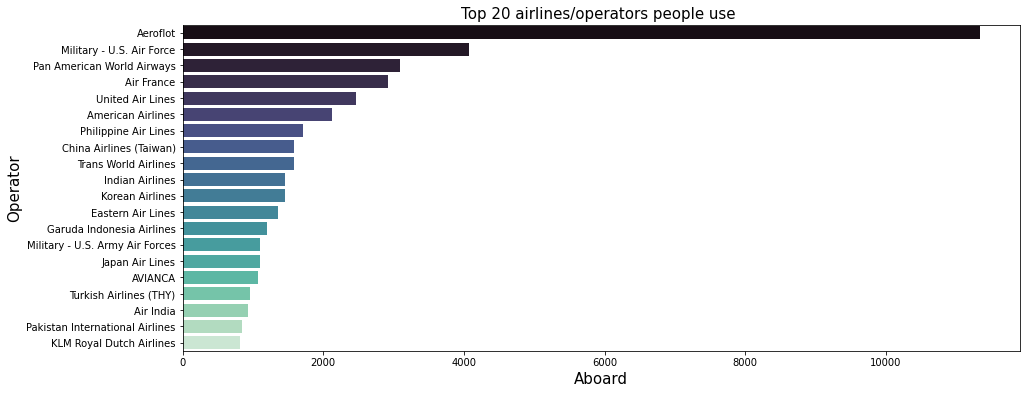

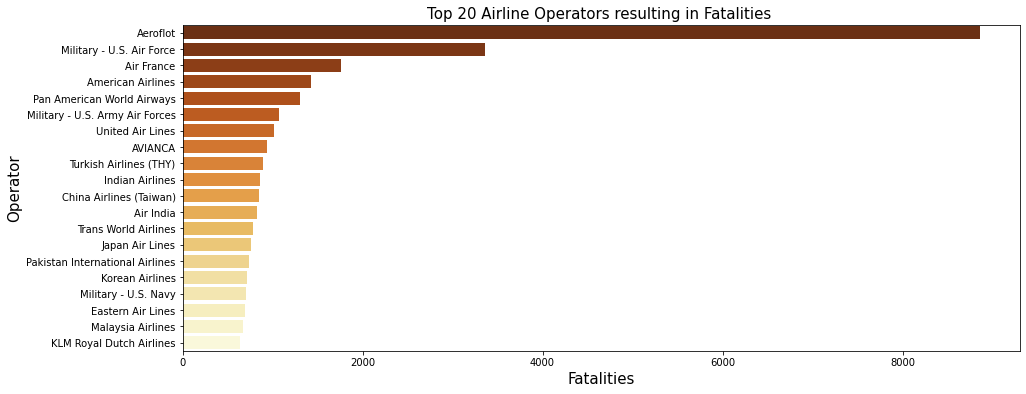

In [64]:
#Top 20 airlines/operators people use:

Travel_by_Op = Data.groupby('Operator')[['Aboard']].sum()
Travel_by_Op = Travel_by_Op.rename(columns={"Operator": "Aboard"})
Travel_by_Op = Travel_by_Op.sort_values(by='Aboard', ascending=False)
Travel_by_OpTOP = Travel_by_Op.head(20)

plt.figure(figsize=(15,6))
sns.barplot(x="Aboard", y=Travel_by_OpTOP.index, data=Travel_by_OpTOP, palette="mako")
plt.xlabel('Aboard', fontsize=15)
plt.ylabel('Operator', fontsize=15)
plt.title('Top 20 airlines/operators people use ', loc='Center', fontsize=15)
plt.show()



#Top 20 Airline Operators resulting in Fatalities:

Prop_by_Op = Data.groupby('Operator')[['Fatalities']].sum()
Prop_by_Op = Prop_by_Op.rename(columns={"Operator": "Fatalities"})
Prop_by_Op = Prop_by_Op.sort_values(by='Fatalities', ascending=False)
Prop_by_OpTOP = Prop_by_Op.head(20)

plt.figure(figsize=(15,6))
sns.barplot(y=Prop_by_OpTOP.index, x="Fatalities", data=Prop_by_OpTOP, palette="YlOrBr_r", orient='h')
plt.xlabel('Fatalities', fontsize=15)
plt.ylabel('Operator', fontsize=15)
plt.title('Top 20 Airline Operators resulting in Fatalities ', loc='Center', fontsize=15)
plt.show()

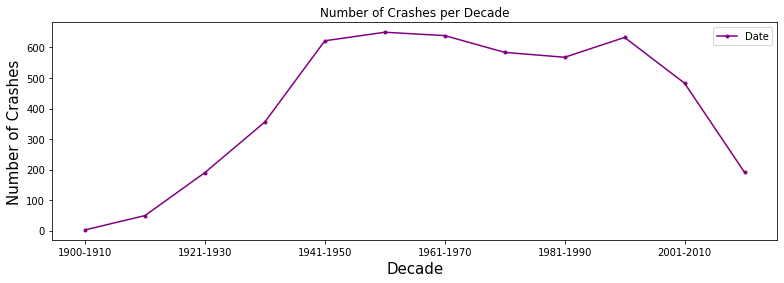

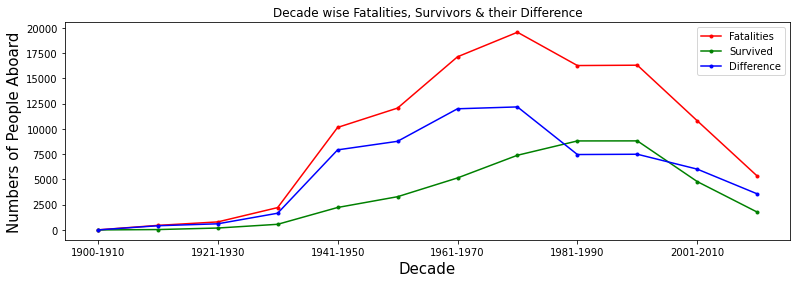

In [65]:
#Number of crashes per decade:
#Decade wise fatalities, survivors & their difference:

CrashpDec =Data.loc[:,["Date","Decade"]].groupby(['Decade']).count()
plot1 = CrashpDec.plot(title = 'Number of Crashes per Decade', figsize = (13,4),color='purple', marker = ".",linewidth=1.5)
plot1.set_xlabel("Decade", fontsize= 15)
plot1.set_ylabel("Number of Crashes", fontsize = 15)

Data['Difference']=Data['Fatalities']-Data['Survived']
YearStats = Data.loc[:, ["Decade","Fatalities", "Survived","Difference"]].groupby(['Decade']).sum()
plot2 = YearStats.plot(title='Decade wise Fatalities, Survivors & their Difference', figsize=(13,4), color='rgb',marker = ".",linewidth=1.5)
plot2.set_xlabel("Decade", fontsize=15)
plot2.set_ylabel("Numbers of People Aboard", fontsize=15)
plt.show()

                        No. of crashes
Moscow, Russia                      17
New York, New York                  14
Manila, Philippines                 14
Cairo, Egypt                        13
Sao Paulo, Brazil                   13
Rio de Janeiro, Brazil              12
Bogota, Colombia                    12
Chicago, Illinois                   11
Near Moscow, Russia                 11
Tehran, Iran                        10
Ankara, Turkey                       9
London, England                      8
Rome, Italy                          8
Cleveland, Ohio                      7
Paris, France                        7
North Atlantic Ocean                 7
Burbank, California                  7
Amsterdam, Netherlands               7
Kunming, China                       7
Denver, Colorado                     7


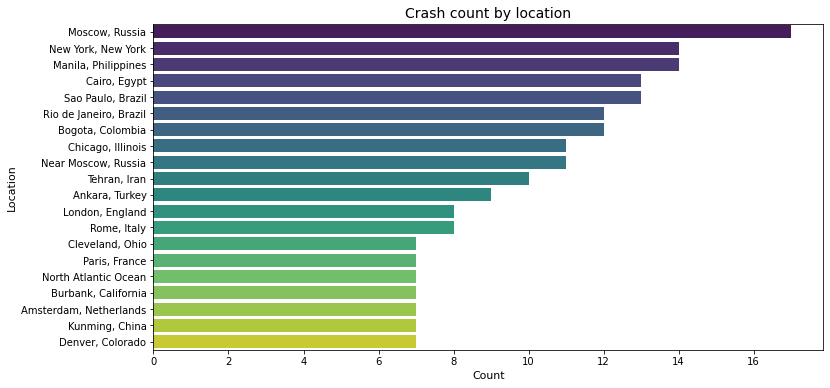

In [66]:
#Top 20 places where crashes take place

import collections

loc_list = collections.Counter(Data['Location'].dropna()).most_common(20)
locs = []
crashes = []
for loc in loc_list:
    locs.append(loc[0])
    crashes.append(loc[1])
dangerous_locations = pd.DataFrame({'No. of crashes' : crashes}, index=locs)

print(dangerous_locations)


#crash count by location - top 20 places where crashes take place

plt.figure(figsize=(12,6))
sns.barplot(y=dangerous_locations.index, x="No. of crashes", data=dangerous_locations, palette="viridis", orient='h')

plt.xlabel('Count', fontsize=11)
plt.ylabel('Location', fontsize=11)
plt.title('Crash count by location', loc='Center', fontsize=14)
plt.show()

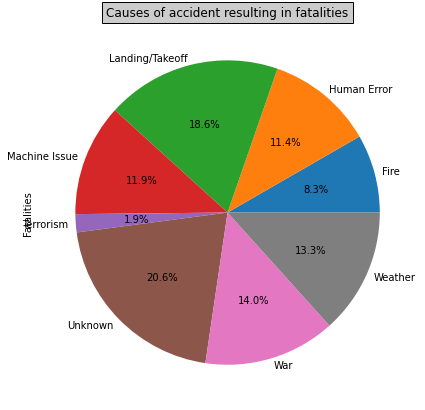

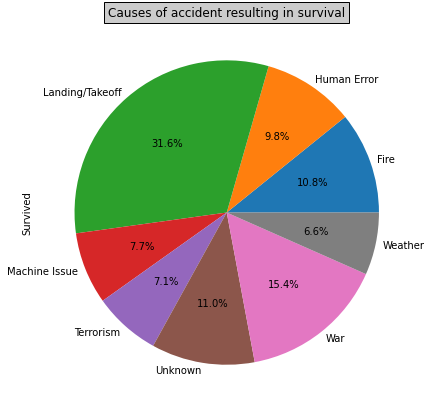

In [67]:
#Causes of accident resulting in fatalities & survival

Fatalities_Stats = Data.loc[:, ["Fatalities","Accident_Code"]].groupby(['Accident_Code']).sum()
Survived_Stats= Data.loc[:, ["Survived","Accident_Code"]].groupby(['Accident_Code']).sum()

plotFatalities_Stats = Fatalities_Stats.plot.pie(figsize=(7,7),subplots=True,labeldistance=(1.05),autopct='%1.1f%%')
plt.title("Causes of accident resulting in fatalities",bbox={'facecolor':'0.8', 'pad':4})
plt.legend('',frameon=False)

plotSurvived_Stats = Survived_Stats.plot.pie(figsize=(7,7),subplots=True,labeldistance=(1.05),autopct='%1.1f%%')
plt.title(label="Causes of accident resulting in survival",bbox={'facecolor':'0.8', 'pad':4})
plt.legend('',frameon=False)

plt.show()

**2B. Filtering Unwanted Outliers**

**DECADE WISE PASSENGERS ABOARD USING BOX PLOT BEFORE UNWANTED OUTLIERS REMOVAL:**

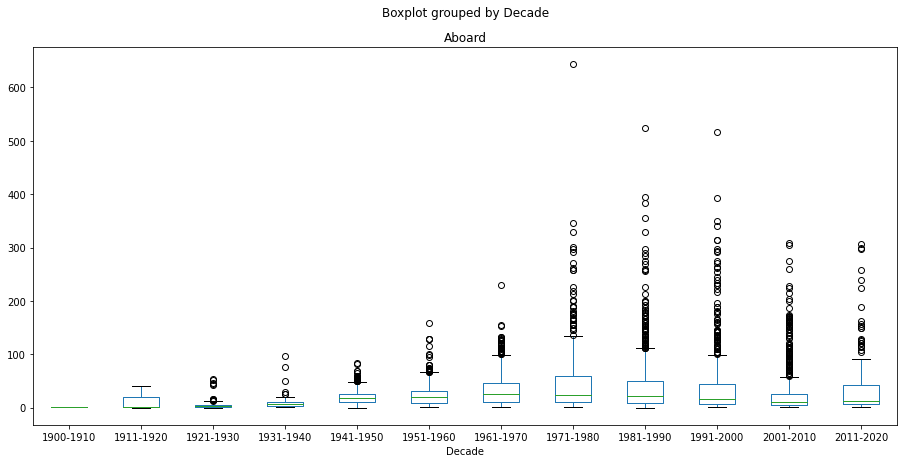

In [68]:
Data.boxplot(by='Decade', column=['Aboard'], figsize=(15,7),grid=False)

**DECADE WISE PASSENGERS USING BOX PLOT *AFTER* UNWANTED OUTLIERS REMOVAL:**

count    4967.000000
mean       30.986511
std        45.387259
min         0.000000
25%         6.000000
50%        16.000000
75%        35.000000
max       644.000000
Name: Aboard, dtype: float64

interquartile range: 29.0
upper_fence: 78.5
lower_fence: -37.5
percentage of Aboard out of lower fence: 0.00 %
percentage of Aboard out of upper fence: 9.74 %
length of input dataframe: 4967
length of new dataframe after Unwanted Outlier removal: 4483 




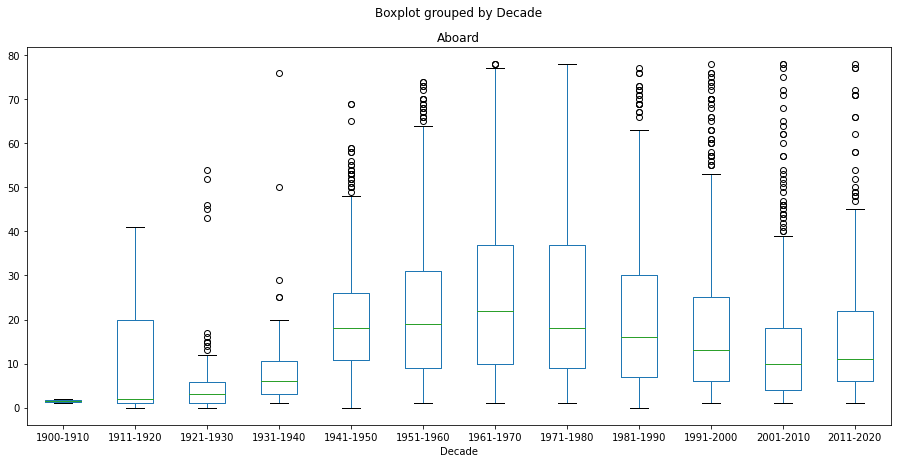

In [69]:
a=Data['Aboard'].describe()
iqr = a.get('75%') - a.get('25%')
print(a)
print("\ninterquartile range:", iqr)

upper_fence = a.get('75%') + 1.5 * iqr
lower_fence = a.get('25%') - 1.5 * iqr
print("upper_fence:", upper_fence)
print("lower_fence:", lower_fence)
    
count_under_lower = len(Data[Data["Aboard"]<lower_fence])
percentage = 100 * (count_under_lower) / a["count"]
print("percentage of Aboard out of lower fence: %.2f"% (percentage),"%")
    
count_over_upper = len(Data[Data["Aboard"]>upper_fence])
percentage = 100 * (count_over_upper) / a["count"]
print("percentage of Aboard out of upper fence: %.2f"% (percentage),"%")

output_dataset = Data[Data["Aboard"]>=lower_fence]
    
output_dataset = Data[Data["Aboard"]<=upper_fence]
    
print("length of input dataframe:", len(Data))
print("length of new dataframe after Unwanted Outlier removal:", len(output_dataset),"\n\n")



output_dataset.boxplot(by='Decade', column=['Aboard'], figsize=(15,7),grid=False)

**DECADE WISE FATALITIES USING BOX PLOT *BEFORE* UNWANTED OUTLIERS REMOVAL:**

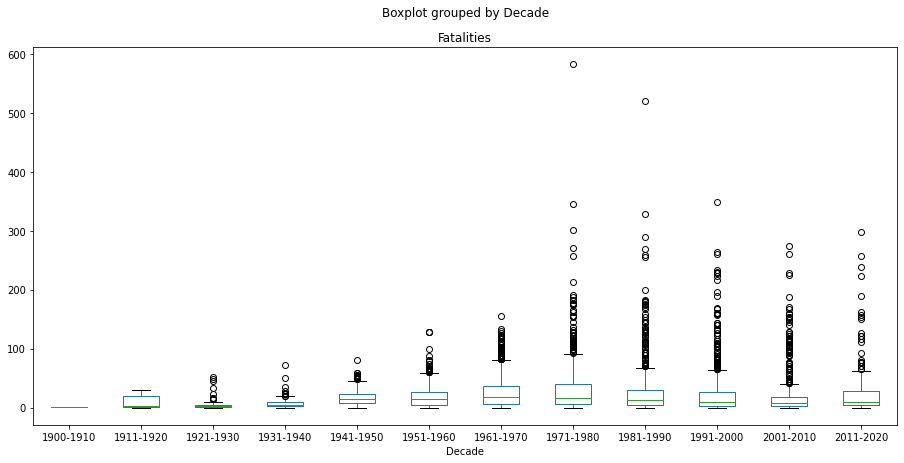

In [70]:
Data.boxplot(by='Decade', column=['Fatalities'], figsize=(15,7),grid=False)

**DECADE WISE FATALITIES USING BOX PLOT AFTER UNWANTED OUTLIERS REMOVAL:**

count    4967.000000
mean       22.339239
std        34.997961
min         0.000000
25%         4.000000
50%        11.000000
75%        25.000000
max       583.000000
Name: Fatalities, dtype: float64

interquartile range: 21.0
upper_fence: 56.5
lower_fence: -27.5
percentage of Fatalities out of lower fence: 0.00 %
percentage of Fatalities out of upper fence: 9.06 %
length of input dataframe: 4967
length of new dataframe after Unwanted Outlier removal: 4517 




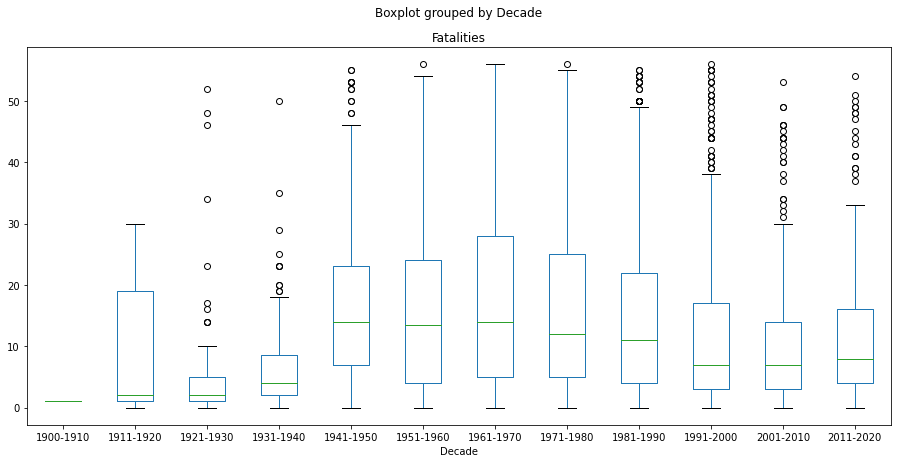

In [71]:
a=Data['Fatalities'].describe()
iqr = a.get('75%') - a.get('25%')
print(a)
print("\ninterquartile range:", iqr)

upper_fence = a.get('75%') + 1.5 * iqr
lower_fence = a.get('25%') - 1.5 * iqr
print("upper_fence:", upper_fence)
print("lower_fence:", lower_fence)
    
count_under_lower = len(Data[Data["Fatalities"]<lower_fence])
percentage = 100 * (count_under_lower) / a["count"]
print("percentage of Fatalities out of lower fence: %.2f"% (percentage),"%")
    
count_over_upper = len(Data[Data["Fatalities"]>upper_fence])
percentage = 100 * (count_over_upper) / a["count"]
print("percentage of Fatalities out of upper fence: %.2f"% (percentage),"%")

output_dataset = Data[Data["Fatalities"]>=lower_fence]
    
output_dataset = Data[Data["Fatalities"]<=upper_fence]
    
print("length of input dataframe:", len(Data))
print("length of new dataframe after Unwanted Outlier removal:", len(output_dataset),"\n\n")



output_dataset.boxplot(by='Decade', column=['Fatalities'], figsize=(15,7),grid=False)

**REMAINING:**
Removing unwanted outliers for categorical data (bar charts)

**Task 3:** Normalization and Standardization
1. Compute the mean and variance for each of the columns.
2. Normalize all the numeric columns, to make mean 0 and variance 1
3. Discuss why is normalization is needed? How does it affect dataset? 
4. Use graphs used to check whether the data is normal.


In [72]:
import statistics

aboard_list = Data[["Aboard"]].values.tolist()
aboard_list = [item for elem in aboard_list for item in elem]
a_mean = statistics.mean(aboard_list)
a_std = statistics.pvariance(aboard_list)**0.5
aboard_n = [(x - a_mean)/(a_std) for x in aboard_list]
print("Mean of total passengers: ", round(a_mean))
print("Variance of total passengers: ", round(statistics.pvariance(aboard_list)))
print("Mean of normalized passengers: ", round(statistics.mean(aboard_n)))
print("Variance of normalized passengers: ", round(statistics.pvariance(aboard_n)))
print()

fatal_list = Data[["Fatalities"]].values.tolist()
fatal_list = [item for elem in fatal_list for item in elem]
f_mean = statistics.mean(fatal_list)
f_std = statistics.pvariance(fatal_list)**0.5
fatal_n = [(x - f_mean)/(f_std) for x in fatal_list]
print("Mean of total deaths: ", round(f_mean))
print("Variance of total deaths: ", round(statistics.pvariance(fatal_list)))
print("Mean of normalized deaths: ", round(statistics.mean(fatal_n)))
print("Variance of normalized deaths: ", round(statistics.pvariance(fatal_n)))
print()

Mean of total passengers:  31
Variance of total passengers:  2060
Mean of normalized passengers:  0
Variance of normalized passengers:  1

Mean of total deaths:  22
Variance of total deaths:  1225
Mean of normalized deaths:  0
Variance of normalized deaths:  1



Normalization is needed to make the data easier to compare by scaling up or down and to remove effects caused by outliers or overwhelmingly large quantities in a single subset.
The graph thus produced shows a normal distribution and can be used to compare vriables with different ranges.


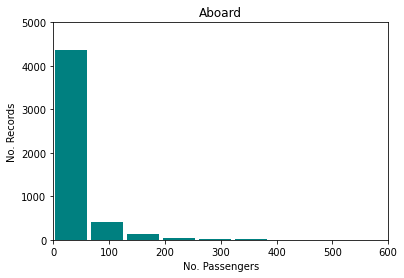

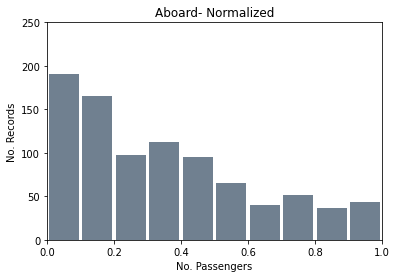

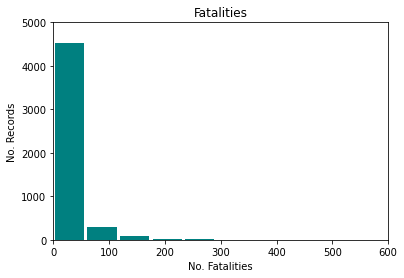

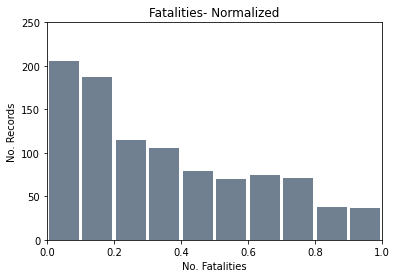

In [73]:
import matplotlib.pyplot as plt

range = (0, 1) 
bins = 10

plt.hist(aboard_list, bins, histtype = 'bar', rwidth = 0.9, color='teal')
plt.title('Aboard')
plt.ylabel('No. Records')
plt.xlabel('No. Passengers')
plt.ylim(0, 5000)
plt.xlim(0, 600)
plt.show() 
plt.hist(aboard_n, bins, range, histtype = 'bar', rwidth = 0.9, color='slategrey')
plt.title('Aboard- Normalized')
plt.ylabel('No. Records')
plt.xlabel('No. Passengers')
plt.ylim(0, 250)
plt.xlim(0, 1)
plt.show() 

plt.hist(fatal_list, bins, histtype = 'bar', rwidth = 0.9, color='teal')
plt.title('Fatalities')
plt.ylabel('No. Records')
plt.xlabel('No. Fatalities')
plt.ylim(0, 5000)
plt.xlim(0, 600)
plt.show()
plt.hist(fatal_n, bins, range, histtype = 'bar', rwidth = 0.9, color='slategray')
plt.title('Fatalities- Normalized')
plt.ylabel('No. Records')
plt.xlabel('No. Fatalities')
plt.ylim(0, 250)
plt.xlim(0, 1)
plt.show()

**Task 4:** Hypothesis Testing
1. State the research hypothesis.
2. Perform statistical tests.
3. Freedom to make your own hypothesis based on the columns.
4. Decide whether the null hypothesis is supported or rejected.


In [74]:
#Code to stop execution if conditions n*p0 > 10 and n*(1-p0)>10 aren't satisfied
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

**TIME COLUMN**

In [75]:
Sample_data = Data["Time"]
print("Using p-value approach for Hypothesis Testing.")
print("This is a large data sample, hence we use z test.")
print("We use population proportion for this test.")

# Hypothesis
# Null Hypothesis, H0: More than or equal to 75% of the aircrafts crash before 12PM. (p >= 0.75)
H0 = "More than or equal to 75% of the aircrafts crash before 12PM."
print("\nNull Hypothesis, H0: " + H0 + " (p >= 0.75)")

# Alternate Hypothesis, H1: Less than 75% of the aircrafts crash before 12PM. (p < 0.75)
H1="Less than 75% of the aircrafts crash before 12PM."
print("Alternate Hypothesis, H1: " + H1 + " (p < 0.75)")

p0 = 0.75
print("\np0 = " + str(p0))
number_of_values = len(Data)
print("Total number of values in the column, n = " + str(number_of_values))

# Conditions n*p0 > 10 and n*(1-p0)>10 checking
if (number_of_values*p0 > 10 and number_of_values*(1-p0)>10 ):
  print("Conditions n*p0 > 10 and n*(1-p0)>10 are satisfied.")
else:
  print("Conditions n*p0 > 10 and n*(1-p0)>10 are not satisfied.")
  raise StopExecution 

# Code for number of successes in number_of_values independent Bernoulli trials, each with success probability p0
temp4=0
for i in Sample_data:
  if (i<='12:00'):
    temp4=temp4+1
X=temp4
print("Number of successes, X = " + str(X))

# Determining if the test is one tailed or two tailed and alloting alpha value
test="one_tailed_test"
if(test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif(test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

p_hat = X/number_of_values

# Z score
z_score=(p_hat-p0)/(np.sqrt((p0 * (1-p0))/(number_of_values)))

# p Value
p_value = scipy.stats.norm.cdf(z_score)

if p_value > alpha:
    print('\nFailed to reject the null hypothesis. Null hypothesis is plausible and hence alternate hypothesis is also plausible.')

else:
    print('\nNull hypothesis is rejected and alternate hypothesis is accepted.')
    print('Accepted hypothesis is H1:',H1)

print('\nz_score = %.10f' % (z_score))
print('p_value = %.10f' % (p_value))
print('The test is '+str(number_of_tails)+' tailed test and is a left tailed test.')

Using p-value approach for Hypothesis Testing.
This is a large data sample, hence we use z test.
We use population proportion for this test.

Null Hypothesis, H0: More than or equal to 75% of the aircrafts crash before 12PM. (p >= 0.75)
Alternate Hypothesis, H1: Less than 75% of the aircrafts crash before 12PM. (p < 0.75)

p0 = 0.75
Total number of values in the column, n = 4967
Conditions n*p0 > 10 and n*(1-p0)>10 are satisfied.
Number of successes, X = 1483

Null hypothesis is rejected and alternate hypothesis is accepted.
Accepted hypothesis is H1: Less than 75% of the aircrafts crash before 12PM.

z_score = -73.4744454073
p_value = 0.0000000000
The test is 1 tailed test and is a left tailed test.


**FATALITIES** **COLUMN**

In [76]:
Sample_data = Data["Fatalities"]
print("Using p-value approach for Hypothesis Testing.")
print("This is a large data sample, hence we use z test.")
print("We use population proportion for this test.")

number_of_values = len(Data)
print("\nTotal number of values in the column, n = " + str(number_of_values))
p0 = 0.75
print("p0 = " + str(p0))

# Hypothesis
# Null Hypothesis, H0: More than or equal to 75% of the aircrafts fatalities are greater than 50% of the maximum fatalities. (p >= 0.75)
H0 = "More than or equal to 75% of the aircrafts fatalities are greater than 50% of the maximum fatalities."
print("\nNull Hypothesis, H0: " + H0 + " (p >= 0.75)")

# Alternate Hypothesis, H1: Less than 75% of the aircrafts  fatalities are greater than 50% of the maximum fatalities. (p < 0.75)
H1="Less than 75% of the aircrafts fatalities are greater than 50% of the maximum fatalities."
print("Alternate Hypothesis, H1: " + H1 + " (p < 0.75)")

max_fatalities = max(Data['Fatalities'])
print("\nMaximum fatality in a plane crash = " + str(max_fatalities))

# Conditions n*p0 > 10 and n*(1-p0)>10 checking
if (number_of_values*p0 > 10 and number_of_values*(1-p0)>10 ):
  print("\nConditions n*p0 > 10 and n*(1-p0) > 10 are satisfied.")
else:
  print("\nConditions n*p0 > 10 and n*(1-p0) > 10 are not satisfied.")
  raise StopExecution 

# Code for number of successes in number_of_values independent Bernoulli trials, each with success probability p0
temp5=0
for i in Sample_data:
  if (i < math.ceil(max(Data['Fatalities'])/2)):
    temp5=temp5+1
X=temp5
print("Number of successes, X = " + str(X))

# Determining if the test is one tailed or two tailed and alloting alpha value
test="one_tailed_test"
if (test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif (test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

p_hat = X/number_of_values

# Z score
z_score=(p_hat-p0)/(np.sqrt((p0 * (1-p0))/(number_of_values)))

# p Value
p_value = scipy.stats.norm.cdf(z_score) 

if p_value > alpha:
    print('\nFailed to reject the null hypothesis. Null hypothesis is plausible and hence alternate hypothesis is also plausible.')

else:
    print('\nNull hypothesis is rejected and alternate hypothesis is accepted.')
    print('Accepted hypothesis is H1:',H1)

print('\nz_score = %.10f' % (z_score))
print('p_value = %.10f' % (p_value))
print('The test is '+str(number_of_tails)+' tailed test and is a left tailed test.')

Using p-value approach for Hypothesis Testing.
This is a large data sample, hence we use z test.
We use population proportion for this test.

Total number of values in the column, n = 4967
p0 = 0.75

Null Hypothesis, H0: More than or equal to 75% of the aircrafts fatalities are greater than 50% of the maximum fatalities. (p >= 0.75)
Alternate Hypothesis, H1: Less than 75% of the aircrafts fatalities are greater than 50% of the maximum fatalities. (p < 0.75)

Maximum fatality in a plane crash = 583.0

Conditions n*p0 > 10 and n*(1-p0) > 10 are satisfied.
Number of successes, X = 4960

Failed to reject the null hypothesis. Null hypothesis is plausible and hence alternate hypothesis is also plausible.

z_score = 40.4605068421
p_value = 1.0000000000
The test is 1 tailed test and is a left tailed test.


**OPERATORS COLUMN**

In [77]:
Sample_data = Data["Op_Code"]
print("Using p-value approach for Hypothesis Testing.")
print("This is a large data sample, hence we use z test.")
print("We use population proportion for this test.")
 
number_of_values = len(Data)
print("\nTotal number of values in the column, n = " + str(number_of_values))
p0 = 0.50
print("p0 = " + str(p0))
 
# Hypothesis
# Null Hypothesis, H0: Less than or equal to 50% of the aircrafts are of military or passenger operated. (p <= 0.50)
H0 = "Less than or equal to 50% of the aircrafts are of military or passenger operated."
print("\nNull Hypothesis, H0: " + H0 + " (p <= 0.50)")
 
# Alternate Hypothesis, H1: More than 50% of the aircrafts are of military or passenger operated. (p > 0.50)
H1 = "More than 50% of the aircrafts are of military or passenger operated."
print("Alternate Hypothesis, H1: " + H1 + " (p > 0.50)")
 
# Conditions n*p0 > 10 and n*(1-p0)>10 checking
if (number_of_values*p0 > 10 and number_of_values*(1-p0)>10 ):
  print("Conditions n*p0 > 10 and n*(1-p0)>10 are satisfied.")
else:
  print("Conditions n*p0 > 10 and n*(1-p0)>10 are not satisfied.")
  raise StopExecution 
 
# Code for number of successes in number_of_values independent Bernoulli trials, each with success probability p0
temp6=0
for i in Sample_data:
  if (i == 'Military' or i == 'Passenger'):
    temp6=temp6+1
X=temp6
print("Number of successes, X = " + str(X))
 
# Determining if the test is one tailed or two tailed and alloting alpha value
test="one_tailed_test"
if (test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif (test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05
 
p_hat = X/number_of_values
 
# Z score
z_score=(p_hat-p0)/(np.sqrt((p0 * (1-p0))/(number_of_values)))
 
# p Value
p_value = scipy.stats.norm.sf(z_score) 
 
if p_value > alpha:
    print('\nFailed to reject the null hypothesis. Null hypothesis is plausible and hence alternate hypothesis is also plausible.')
 
else:
    print('\nNull hypothesis is rejected and alternate hypothesis is accepted.')
    print('Accepted hypothesis is H1:',H1)
 
print('\nz_score = %.10f' % (z_score))
print('p_value = %.10f' % (p_value))
print('The test is '+str(number_of_tails)+' tailed test and is a right tailed test.')

Using p-value approach for Hypothesis Testing.
This is a large data sample, hence we use z test.
We use population proportion for this test.

Total number of values in the column, n = 4967
p0 = 0.5

Null Hypothesis, H0: Less than or equal to 50% of the aircrafts are of military or passenger operated. (p <= 0.50)
Alternate Hypothesis, H1: More than 50% of the aircrafts are of military or passenger operated. (p > 0.50)
Conditions n*p0 > 10 and n*(1-p0)>10 are satisfied.
Number of successes, X = 4880

Null hypothesis is rejected and alternate hypothesis is accepted.
Accepted hypothesis is H1: More than 50% of the aircrafts are of military or passenger operated.

z_score = 68.0080541542
p_value = 0.0000000000
The test is 1 tailed test and is a right tailed test.


**Task 5:**Correlation
1. Find the correlation between variables that are positively and negatively related.
2. State inferences about it.


In [78]:
# Is their a correlation between the passengers on board and the survivors ?

SurCorr = Data[['Aboard','Survived','Fatalities']]
print('What is the survival correlation between passengers Aboard and the Survivors ?')
SurCorr.corr(method ='spearman')

What is the survival correlation between passengers Aboard and the Survivors ?


,Aboard,Survived,Fatalities
Aboard,1.000000,0.345533,0.744119
Survived,0.345533,1.000000,-0.173281
Fatalities,0.744119,-0.173281,1.000000


There is a high correlation of 0.74 between the passengers aboard and the number of fatalities. So, if the passengers aboard are more, the fatalities will be more. This is in line with the logic that if more passengers travel, the fatalities will also be more.

There is a negative correlation of -0.17 between the passengers survived and the number of fatalities. This implies that, as the number of fatalitiles increase, the number of survivors decrease and vice-versa.

There is no correlation between passengers aboard and passengers survived as the correlation coefficient is less than 0.5

In [79]:
Data.head()

,Decade,Year,Date,Time,Location,Operator,Op_Code,Route,AC Type,Make_Type,Aboard,Fatalities,Accident_Code,Summary,Survived,Difference
0,1900-1910,1908,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Military,Demonstration,Wright Flyer III,Wright,2.0,1.0,Human Error,"During a demonstration flight, a U.S. Army fly...",1.0,0.0
1,1900-1910,1909,1909-07-09,15:00:00,"Juvisy-sur-Orge, France",Unknown,Others,Air show,Wright Byplane,Wright,1.0,1.0,Unknown,Eugene Lefebvre was the first pilot to ever be...,0.0,1.0
2,1911-1920,1912,1912-12-07,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Military,Test flight,Dirigible,Dirigibl,5.0,5.0,War,First U.S. dirigible Akron exploded just offsh...,0.0,5.0
3,1911-1920,1913,1913-06-08,15:00:00,"Victoria, British Columbia, Canada",Private,Passenger,Unknown,Curtiss seaplane,Curtiss,1.0,1.0,Weather,The first fatal airplane accident in Canada oc...,0.0,1.0
4,1911-1920,1913,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,Military,Unknown,Zeppelin L-1 (airship),Zeppelin,20.0,14.0,Landing/Takeoff,The airship flew into a thunderstorm and encou...,6.0,8.0


,Year,Aboard,Fatalities,Survived,Difference
Year,1.000000,0.211712,0.161567,0.129724,0.035854
Aboard,0.211712,1.000000,0.741470,0.637626,0.137351
Fatalities,0.161567,0.741470,1.000000,-0.044111,0.766469
Survived,0.129724,0.637626,-0.044111,1.000000,-0.675467
Difference,0.035854,0.137351,0.766469,-0.675467,1.000000


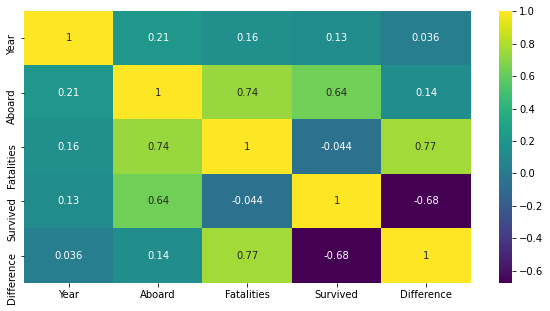

In [80]:
#Creating heatmap for Correlation Matrix
plt.figure(figsize=(10,5))
c = Data.corr()
sns.heatmap(c, cmap="viridis", annot=True)
c

**THE END  :)**